In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [2]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [4]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [5]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [6]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [7]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [8]:
import pandas as pd

df = pd.read_json("new_dataset.json")
print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [9]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [10]:
min_samples = 1381

df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [11]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [12]:
target = {"BUSINESS": 0, "SPORTS": 1, "CRIME": 2, "SCIENCE": 3}
df_balanced["category_num"] = df_balanced.category.map(target)

In [13]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)

In [15]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [16]:
y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [19]:
df_balanced["preprocessed_text"] = df_balanced.text.apply(preprocess)

In [20]:
df_balanced.head()

,text,category,category_num,preprocessed_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)

In [22]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



## Plot Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[243,   8,  17,   8],
       [ 10, 228,  29,  10],
       [ 15,   2, 253,   6],
       [ 36,   9,   7, 224]], dtype=int64)

In [36]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize=(7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## Exercise

In [2]:
import pandas as pd

df = pd.read_csv("Fake_Real_Data.csv")
print(df.shape)
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df["label"].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [4]:
label_num = {"Fake": 0, "Real":1}

df["label_num"] = df.label.map(label_num)
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Text, df.label_num, test_size=0.2, stratify=df.label_num, random_state=2022)

print(X_train.shape, X_test.shape)

(7920,) (1980,)


### Unigram, Bigram, Trigram + KNN Euclidean

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

clf = Pipeline([
    ('vectorizer_ngram', CountVectorizer(ngram_range=(1,3))),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



Text(42.0, 0.5, 'Truth')

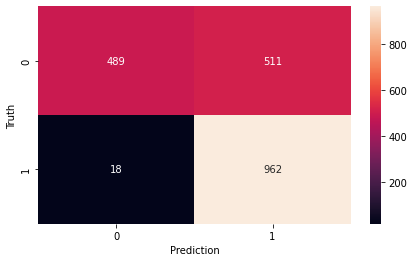

In [17]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Unigram, Bigram, Trigram + KNN Cosine

In [18]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



Text(42.0, 0.5, 'Truth')

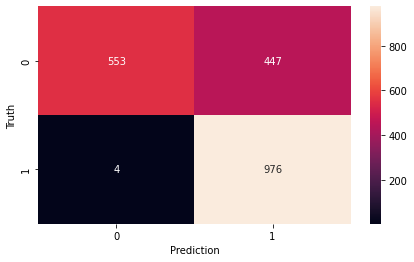

In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [20]:
y_test.value_counts()

label_num
0    1000
1     980
Name: count, dtype: int64

### Trigram + Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(3,3))),
    ('Random_Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Text(42.0, 0.5, 'Truth')

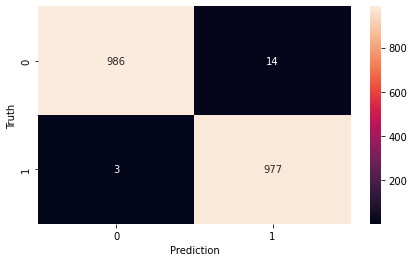

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Unigram, Bigram + MultinomialNB

In [30]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi_NB', MultinomialNB(alpha=0.75))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Text(42.0, 0.5, 'Truth')

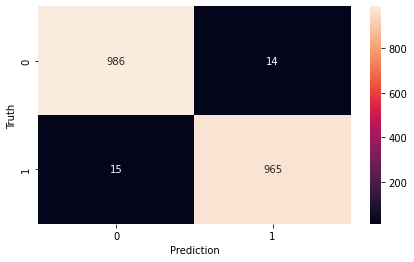

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')